In [1]:
import time
import sys

In [2]:
def twos_complement(hexstr,bits):
    value = int(hexstr,16)
    if value & (1 << (bits-1)):
        value -= 1 << bits
    return value

def binary_data_loading(file):
    if file == '': return []
    hex_data = open(file, 'rb').read().hex()
    final_data = []
    for base_idx in range(0, len(hex_data), 28):
        row = {
                'hex_str_sec': '',
                'second_epoch_int': 0,
                'second_epoch_twos_complement': 0,
                'hex_str_ms' : '',
                'ms_epoch_int': 0,
                'ms_epoch_twos_complement': 0,
                'x_val': 0,
                'y_val': 0,
                'z_val': 0
                }

        idx = base_idx
        row['hex_str_sec'] = hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]
        row['second_epoch_int'] = int((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + 
                                hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)
        row['second_epoch_twos_complement'] = twos_complement((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + 
                                hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 32)

        idx += 8
        row['hex_str_ms'] = hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]
        row['ms_epoch_int'] = int((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + 
                                hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)
        row['ms_epoch_twos_complement'] = twos_complement((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + 
                                hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 32)
        
        idx += 8
        row['x_val'] = twos_complement((hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        idx += 4
        row['y_val'] = twos_complement((hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        idx += 4
        row['z_val'] = twos_complement((hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        final_data.append(row)

    return final_data

In [3]:
file1 = '1_20230406052037_2141_ACL_1.bin'

In [4]:
ab = binary_data_loading(file1)

In [5]:
import pandas as pd
abc = pd.DataFrame(ab)

def time_stamp_int(dataframe):
    t_sec = dataframe['second_epoch_int']
    t_micros = dataframe['ms_epoch_int']
    dataframe['time'] = t_sec + t_micros/1000000
    
    return dataframe

def time_stamp_twos(dataframe):
    t_sec = dataframe['second_epoch_twos_complement']
    t_micros = dataframe['ms_epoch_twos_complement']
    dataframe['time'] = t_sec + t_micros/1000000
    
    return dataframe


In [6]:
ts_int = time_stamp_int(abc)
ts_twos_complement = time_stamp_twos(abc)

In [7]:
ts_stamp = ts_int["time"]

for i in ts_stamp:
    print(str(i))

1680168659.450546
1680168659.442986
1680168659.442986
1680168659.442986
1680168659.442986
1680168659.442986
1680168659.459354
1680168659.459354
1680168659.459354
1680168659.459354
1680168659.459354
1680168659.459354
1680168659.459354
1680168659.459354
1680168659.459354
1680168659.475397
1680168659.475397
1680168659.475397
1680168659.475397
1680168659.475397
1680168659.475397
1680168659.475397
1680168659.475397
1680168659.475397
1680168659.491349
1680168659.491349
1680168659.491349
1680168659.491349
1680168659.491349
1680168659.491349
1680168659.491349
1680168659.491349
1680168659.491349
1680168659.507342
1680168659.507342
1680168659.507342
1680168659.507342
1680168659.507342
1680168659.507342
1680168659.507342
1680168659.507342
1680168659.507342
1680168659.522563
1680168659.522563
1680168659.522563
1680168659.522563
1680168659.522563
1680168659.522563
1680168659.522563
1680168659.522563
1680168659.522563
1680168659.530492
1680168659.530492
1680168659.530492
1680168659.530492
1680168659

In [8]:
time_diff_int = ts_int['time'].max() - ts_int['time'].min() 
time_diff_twos = ts_twos_complement['time'].max() - ts_twos_complement['time'].min() 

In [9]:
print(time_diff_int, time_diff_twos)
print(time_diff_int/60)

60.56464409828186 60.56464409828186
1.0094107349713644


In [10]:
len(ts_int)

33776

In [11]:
len(ts_int)/time_diff_twos

557.6851065976656

In [19]:
abc['x_val'].mean()

-71.7080767408811

In [20]:
abc['adjusted_x'] = abc.x_val.values
abc.loc[abc.adjusted_x == 0, "adjusted_x"] = abc['adjusted_x'].mean()

In [25]:
abc.describe()

second_epoch_int  second_epoch_twos_complement   ms_epoch_int  \
count      3.377600e+04                  3.377600e+04   33776.000000   
mean       1.680169e+09                  1.680169e+09  503408.586333   
std        1.859038e+01                  1.859038e+01  288494.721862   
min        1.680169e+09                  1.680169e+09     172.000000   
25%        1.680169e+09                  1.680169e+09  253373.000000   
50%        1.680169e+09                  1.680169e+09  506598.000000   
75%        1.680169e+09                  1.680169e+09  752636.500000   
max        1.680169e+09                  1.680169e+09  999655.000000   

       ms_epoch_twos_complement         x_val         y_val         z_val  \
count              33776.000000  33776.000000  33776.000000  33776.000000   
mean              503408.586333    -71.708077   -204.139803    -93.083225   
std               288494.721862     26.883905     52.725259     18.131169   
min                  172.000000   -512.000000   -458.000000   -384.000000   
25%               253373.000000    -82.000000   -222.000000   -100.000000   
50%               506598.000000    -76.000000   -216.000000    -94.000000   
75%               752636.500000    -70.000000   -210.000000    -86.000000   
max               999655.000000    292.000000     66.000000    254.000000   

         adjusted_x  
count  33776.000000  
mean     -76.845853  
std       18.108446  
min     -512.000000  
25%      -82.000000  
50%      -76.000000  
75%      -71.708077  
max      292.000000

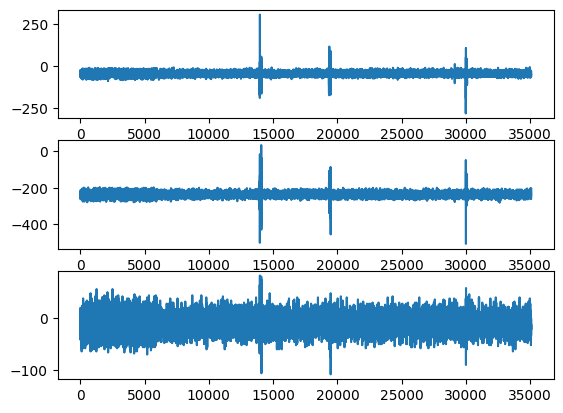

In [120]:
# No movement
file1 = '1_20230406113452_2144_ACL_1.bin'
ab = binary_data_loading(file1)
abc = pd.DataFrame(ab)

abc['adjusted_x'] = abc.x_val.values
abc.loc[abc.adjusted_x == 0, "adjusted_x"] = abc['adjusted_x'].mean()
a = abc["adjusted_x"]

abc['adjusted_y'] = abc.y_val.values
abc.loc[abc.adjusted_y == 0, "adjusted_y"] = abc['adjusted_y'].mean()
b = abc["adjusted_y"]

abc['adjusted_z'] = abc.z_val.values
abc.loc[abc.adjusted_z == 0, "adjusted_z"] = abc['adjusted_z'].mean()
c = abc["adjusted_z"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3)
ax[0].plot(a)
ax[1].plot(b)
ax[2].plot(c)


<AxesSubplot: title={'center': 'Audio file'}>

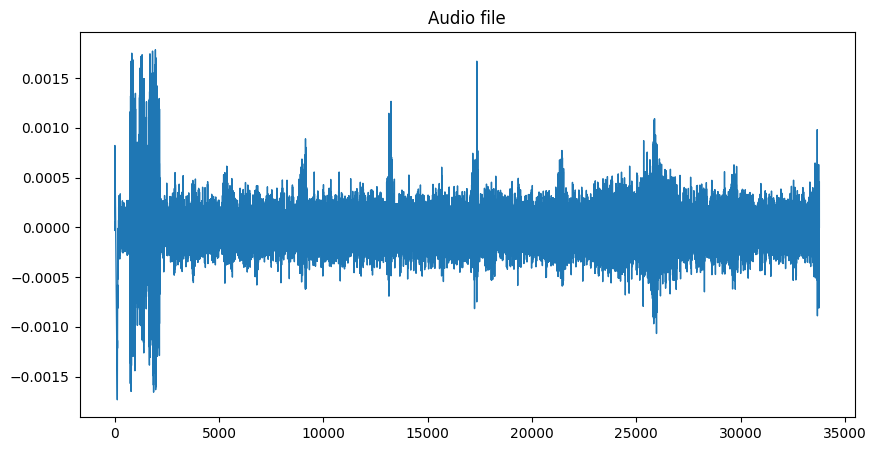

In [87]:
pd.Series(audio).loc[Remove_Outlier_Indices(pd.Series(audio))].plot(figsize=(10, 5),
                  lw = 1,
                  title ='Audio file')

In [ ]:
f_rate

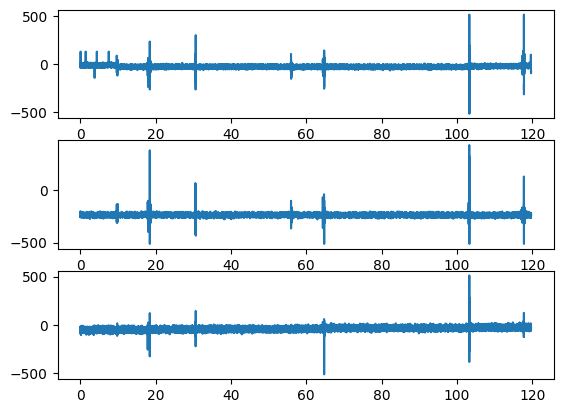

In [169]:
import datetime
import random
import numpy as np
import matplotlib.pyplot as plt


# No movement
file1 = '1_20230407113253_2157_ACL_1.bin'
ab = binary_data_loading(file1)
abc = pd.DataFrame(ab)

# make up some data
x = np.linspace(
        0, # start
        len(abc) / 542.6,
        num = len(abc)
    ) 


abc['adjusted_x'] = abc.x_val.values
abc.loc[abc.adjusted_x == 0, "adjusted_x"] = abc['adjusted_x'].mean()
a = abc["adjusted_x"]

abc['adjusted_y'] = abc.y_val.values
abc.loc[abc.adjusted_y == 0, "adjusted_y"] = abc['adjusted_y'].mean()
b = abc["adjusted_y"]

abc['adjusted_z'] = abc.z_val.values
abc.loc[abc.adjusted_z == 0, "adjusted_z"] = abc['adjusted_z'].mean()
c = abc["adjusted_z"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3)
ax[0].plot(x, a)
ax[1].plot(x, b)
ax[2].plot(x, c)


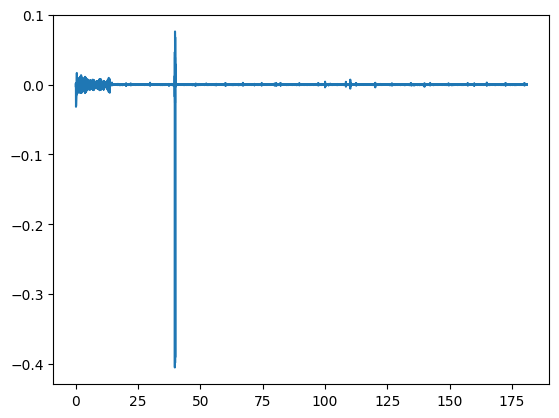

In [155]:
import librosa
audio_to_process: str = "1_20230407070134_2149_SDR_1.mp3"
print()

audio, sr = librosa.load(audio_to_process, sr=44100)

# pd.Series(audio[5000:]).plot(figsize=(10, 5),
#                   lw = 1,
#                   title ='Audio file')
x = np.linspace(
        0, # start
        len(audio) / sr,
        num = len(audio)
    )

plt.plot(x, audio)

import librosa
audio_to_process: str = "1_20230406052037_2141_SDR_1.mp3"
print()

audio, sr = librosa.load(audio_to_process, sr=542.6)

pd.Series(audio[5000:]).plot(figsize=(10, 5),
                  lw = 1,
                  title ='Audio file')

In [100]:
# Movement after 10s interval

file1 = 'C:/Users/ankur/OneDrive/Desktop/bib_project/acc_sample_files/1_20230323113427_2133_ACL_1.bin'
ab = binary_data_loading(file1)
abc = pd.DataFrame(ab)

a = abc["x_val"]
b = abc["y_val"]
c = abc["z_val"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3)
ax[0].plot(a)
ax[1].plot(b)
ax[2].plot(c)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ankur/OneDrive/Desktop/bib_project/acc_sample_files/1_20230323113427_2133_ACL_1.bin'

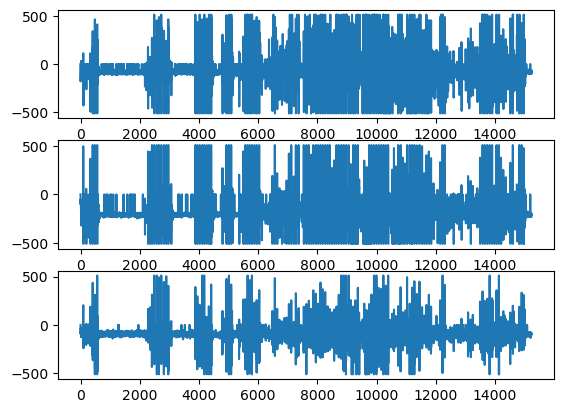

In [38]:
# Continuous movement

file1 = 'C:/Users/ankur/OneDrive/Desktop/bib_project/acc_sample_files/1_20230323113731_2134_ACL_1.bin'
ab = binary_data_loading(file1)
abc = pd.DataFrame(ab)

a = abc["x_val"]
b = abc["y_val"]
c = abc["z_val"]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3)
ax[0].plot(a)
ax[1].plot(b)
ax[2].plot(c)

In [39]:
increment = True

df = ts_int['time']
for i in range(1, len(df)):
    print(df[i])
    if df[i] < df[i-1]:
        print(i)
        increment = False
        break

if increment:
    print('The numbers are in increment.')
else:
    print('The numbers are not in increment.')

1679595564.996839
1
The numbers are not in increment.


In [40]:
1677773274.404228 - 1677773274.32736

0.07686805725097656

In [41]:
d = 1/3200

In [42]:
increment = True

df = ts_twos_complement['time']
for i in range(1, len(df)):
    print(df[i])
    if df[i] < df[i-1]:
        print(df[i])
        increment = False
        break

if increment:
    print('The numbers are in increment.')
else:
    print('The numbers are not in increment.')

1679595564.996839
1679595564.996839
The numbers are not in increment.


In [43]:
ts_twos_complement['time'][2], ts_twos_complement['time'][1]

(1679595564.996839, 1679595564.996839)

In [44]:
1/3200

0.0003125

In [45]:
ts_int['time'][0], ts_int['time'][1]

(1679595565.009749, 1679595564.996839)

In [46]:
print(time_diff_int, time_diff_twos)

123.28704690933228 123.28704690933228


In [ ]:
def time_stamp_int(dataframe):
    t_sec = dataframe['second_epoch_int']
    t_micros = dataframe['ms_epoch_int']
    dataframe['time'] = t_sec + t_micros/1000000
    
    return dataframe

time1 = time_stamp_int(abc)

In [ ]:
time_inst = abc['time']

In [47]:
ts = 1/3200                  # period
df = ts_int['time']
xv = abc['x_val']
for i in range(1, len(xv)):
    d2 = df[i] - df[i-1]
    n_s = round(d2/ts - 1)
#     if n_s != -1.0:
#         print(n_s)
    print(str(df[i]), n_s, xv[i-1])
    
    

1679595564.996839 -42 0
1679595564.996839 -1 -160
1679595564.996839 -1 -180
1679595565.015205 58 -144
1679595565.015205 -1 -138
1679595565.015205 -1 -120
1679595565.015205 -1 -90
1679595565.015205 -1 -36
1679595565.015205 -1 -34
1679595565.015205 -1 -12
1679595565.015205 -1 -22
1679595565.015205 -1 -12
1679595565.032971 56 -28
1679595565.032971 -1 -20
1679595565.032971 -1 0
1679595565.032971 -1 -6
1679595565.032971 -1 2
1679595565.032971 -1 0
1679595565.032971 -1 32
1679595565.032971 -1 32
1679595565.032971 -1 -4
1679595565.047719 46 -38
1679595565.047719 -1 -34
1679595565.047719 -1 -40
1679595565.047719 -1 -60
1679595565.047719 -1 -76
1679595565.047719 -1 -96
1679595565.047719 -1 -112
1679595565.047719 -1 -142
1679595565.047719 -1 -166
1679595565.055391 24 -142
1679595565.055391 -1 -148
1679595565.055391 -1 -134
1679595565.055391 -1 -118
1679595565.055391 -1 -138
1679595565.055391 -1 0
1679595565.055391 -1 -120
1679595565.061684 19 -86
1679595565.061684 -1 -78
1679595565.061684 -1 -68

1679595570.108049 -1 248
1679595570.108049 -1 488
1679595570.108049 -1 486
1679595570.126399 58 -64
1679595570.126399 -1 -388
1679595570.126399 -1 -512
1679595570.126399 -1 -320
1679595570.126399 -1 64
1679595570.126399 -1 220
1679595570.126399 -1 240
1679595570.126399 -1 156
1679595570.126399 -1 76
1679595570.143577 54 -30
1679595570.143577 -1 -104
1679595570.143577 -1 -182
1679595570.143577 -1 -232
1679595570.143577 -1 -246
1679595570.143577 -1 -244
1679595570.143577 -1 -192
1679595570.143577 -1 -154
1679595570.143577 -1 -130
1679595570.161191 55 -124
1679595570.161191 -1 -102
1679595570.161191 -1 -92
1679595570.161191 -1 -94
1679595570.161191 -1 -80
1679595570.161191 -1 -68
1679595570.161191 -1 380
1679595570.161191 -1 0
1679595570.161191 -1 90
1679595570.178955 56 -166
1679595570.178955 -1 52
1679595570.178955 -1 84
1679595570.178955 -1 4
1679595570.178955 -1 44
1679595570.178955 -1 -18
1679595570.178955 -1 -92
1679595570.178955 -1 -64
1679595570.178955 -1 -158
1679595570.196747 56

1679595582.595154 -1 -52
1679595582.595154 -1 -52
1679595582.595154 -1 -62
1679595582.595154 -1 -44
1679595582.595154 -1 -76
1679595582.595154 -1 -96
1679595582.595154 -1 -120
1679595582.595154 -1 -120
1679595582.612971 56 -136
1679595582.612971 -1 -132
1679595582.612971 -1 -136
1679595582.612971 -1 -128
1679595582.612971 -1 -92
1679595582.612971 -1 -114
1679595582.612971 -1 -106
1679595582.612971 -1 -98
1679595582.612971 -1 -84
1679595582.63077 56 -74
1679595582.63077 -1 -64
1679595582.63077 -1 -100
1679595582.63077 -1 -92
1679595582.63077 -1 -80
1679595582.63077 -1 -118
1679595582.63077 -1 -102
1679595582.63077 -1 -116
1679595582.63077 -1 -114
1679595582.648576 56 -126
1679595582.648576 -1 -124
1679595582.648576 -1 0
1679595582.648576 -1 -114
1679595582.648576 -1 -106
1679595582.648576 -1 -114
1679595582.648576 -1 -110
1679595582.648576 -1 -60
1679595582.648576 -1 -162
1679595582.666393 56 -74
1679595582.666393 -1 -94
1679595582.666393 -1 -92
1679595582.666393 -1 -82
1679595582.66639

In [100]:
pd.set_option('display.max_rows', 200)

5

In [54]:
new_df = ts_int.loc[:, ["time", "x_val", "y_val", "z_val"]]
pd.set_option('display.max_rows', 200)
new_df.head(200)

time  x_val  y_val  z_val
0    1.678883e+09      0      0      0
1    1.678883e+09   -104   -192   -126
2    1.678883e+09   -116   -200    -68
3    1.678883e+09   -118   -206   -110
4    1.678883e+09   -124   -186   -100
5    1.678883e+09    -98   -186   -142
6    1.678883e+09   -106   -188   -126
7    1.678883e+09   -120   -192   -130
8    1.678883e+09   -110   -200   -118
9    1.678883e+09   -108   -176   -136
10   1.678883e+09   -128   -160   -116
11   1.678883e+09    -92   -202   -113
12   1.678883e+09   -112   -186   -144
13   1.678883e+09   -114   -186   -120
14   1.678883e+09   -114   -182   -106
15   1.678883e+09   -132   -186   -134
16   1.678883e+09   -114   -196   -114
17   1.678883e+09   -126   -196    -94
18   1.678883e+09   -128   -178   -124
19   1.678883e+09   -120   -214   -118
20   1.678883e+09   -128   -170   -156
21   1.678883e+09   -144   -160   -116
22   1.678883e+09   -116   -192   -118
23   1.678883e+09   -100   -218   -128
24   1.678883e+09   -116   -210   -104
25   1.678883e+09   -110   -208   -128
26   1.678883e+09    -94   -200   -105
27   1.678883e+09    -98   -212    -66
28   1.678883e+09   -102   -202   -142
29   1.678883e+09   -106   -196    -94
30   1.678883e+09   -122   -202    -94
31   1.678883e+09   -114   -182   -110
32   1.678883e+09    -86   -208    -90
33   1.678883e+09    -86   -200   -114
34   1.678883e+09   -116   -192   -112
35   1.678883e+09   -112   -210    -90
36   1.678883e+09    -98   -194   -104
37   1.678883e+09   -124   -202   -109
38   1.678883e+09   -110   -182   -104
39   1.678883e+09   -118   -198   -134
40   1.678883e+09   -120   -174   -100
41   1.678883e+09    -92   -180   -136
42   1.678883e+09   -104   -200   -106
43   1.678883e+09   -128   -192   -122
44   1.678883e+09   -118   -184    -78
45   1.678883e+09      0      0   -114
46   1.678883e+09   -100   -190   -128
47   1.678883e+09      0      0   -112
48   1.678883e+09   -124   -200    -94
49   1.678883e+09      0      0   -122
50   1.678883e+09   -110   -196    -78
51   1.678883e+09      0      0   -116
52   1.678883e+09   -114   -182   -136
53   1.678883e+09      0      0    -96
54   1.678883e+09   -104   -200   -116
55   1.678883e+09      0      0   -110
56   1.678883e+09   -108   -204   -106
57   1.678883e+09   -112   -170   -118
58   1.678883e+09   -108   -200    -94
59   1.678883e+09   -110   -194   -116
60   1.678883e+09      0      0   -115
61   1.678883e+09   -112   -206   -109
62   1.678883e+09      0      0    -90
63   1.678883e+09   -112   -190    -98
64   1.678883e+09      0      0   -104
65   1.678883e+09   -110   -202    -80
66   1.678883e+09      0      0   -102
67   1.678883e+09   -136   -186   -114
68   1.678883e+09    -98   -190   -126
69   1.678883e+09   -110   -192   -140
70   1.678883e+09   -114   -202    -66
71   1.678883e+09      0      0   -106
72   1.678883e+09   -128   -180   -120
73   1.678883e+09   -100   -202   -102
74   1.678883e+09   -112   -170   -152
75   1.678883e+09      0      0   -112
76   1.678883e+09   -110   -218   -100
77   1.678883e+09   -110   -200    -98
78   1.678883e+09      0      0   -106
79   1.678883e+09   -104   -186    -72
80   1.678883e+09   -118   -172   -104
81   1.678883e+09   -112   -200   -123
82   1.678883e+09    -98   -194   -114
83   1.678883e+09   -108   -206   -112
84   1.678883e+09   -128   -190   -106
85   1.678883e+09   -116   -190   -104
86   1.678883e+09      0      0   -110
87   1.678883e+09   -120   -202    -96
88   1.678883e+09   -120   -190    -92
89   1.678883e+09      0      0   -116
90   1.678883e+09    -90   -196   -114
91   1.678883e+09   -120   -196   -120
92   1.678883e+09      0      0   -118
93   1.678883e+09   -108   -188   -114
94   1.678883e+09      0      0   -122
95   1.678883e+09   -112   -194   -128
96   1.678883e+09      0      0    -96
97   1.678883e+09   -104   -198   -108
98   1.678883e+09    -98   -180   -134
99   1.678883e+09   -124   -180    -88
100  1.678883e+09      0      0   -106
101  1.678883e+09   -116   -206    

In [60]:
ts = time_stamp(abc)
ts

hex_str_sec  second_epoch_int  second_epoch_twos_complement hex_str_ms  \
0       63d0eee9        1674637033                    1674571497   000cc65a   
1       63d0eee9        1674637033                    1674571497   000cb5bb   
2       63d0eee9        1674637033                    1674571497   000cb5bb   
3       63d0eee9        1674637033                    1674571497   000cb5bb   
4       63d0eee9        1674637033                    1674571497   000cb5bb   
...          ...               ...                           ...        ...   
7846    63d0eef9        1674637049                    1674571513   000924e5   
7847    63d0eef9        1674637049                    1674571513   000959a2   
7848    63d0eef9        1674637049                    1674571513   000959a2   
7849    63d0eef9        1674637049                    1674571513   000959a2   
7850    63d0eef9        1674637049                    1674571513   000959a2   

      ms_epoch_int  ms_epoch_twos_complement          time  
0           837210                    771674  1.674573e+09  
1           832955                    767419  1.674573e+09  
2           832955                    767419  1.674573e+09  
3           832955                    767419  1.674573e+09  
4           832955                    767419  1.674573e+09  
...            ...                       ...           ...  
7846        599269                    599269  1.674573e+09  
7847        612770                    612770  1.674573e+09  
7848        612770                    612770  1.674573e+09  
7849        612770                    612770  1.674573e+09  
7850        612770                    612770  1.674573e+09  

[7851 rows x 7 columns]

In [61]:
type(ts['time'][0])

numpy.float64

In [62]:
ts['time'].max() - ts['time'].min() 

16.0000159740448

In [63]:
ts['time'].min() 

1674573171.571497

In [39]:
ts_twos_complement['time'][0] - ts_int['time'][0]

0.0

In [ ]:
increment = True

df = ts['time']
for i in range(1, len(df)):
    if df[i] < df[i-1]:
        print(i)
        increment = False
        break

if increment:
    print('The numbers are in increment.')
else:
    print('The numbers are not in increment.')

In [18]:
time.time()

1679476330.032737

In [ ]:
import datetime

def hex_to_timestamp(sec_hex_str, msec_hex_str):
    # Convert seconds and milliseconds to decimal format
    sec = hex_to_decimal(sec_hex_str)
    msec = hex_to_decimal(msec_hex_str)
    
    # Convert seconds and milliseconds to datetime object
    timestamp = datetime.datetime.utcfromtimestamp(sec) + datetime.timedelta(milliseconds=msec)
    
    return timestamp

In [11]:
twos_complement('FF')

-127

In [9]:
# bin(num)

In [ ]:
binary_string = bin(num)[2:]

In [ ]:
twos_complement()

In [ ]:
def twos_complement(hexstr,bits):
    value = int(hexstr,16)
    if value & (1 << (bits-1)):
        value -= 1 << bits
    return value

def binary_data_loading(file):
    if file == '': return []
    hex_data = open(file, 'rb').read().hex()
    final_data = []
    for base_idx in range(0, len(hex_data), 28):
        row = {
                'second_epoch': 0,
                'time': '',
                'millisecond_epoch': 0,
                'x_val': 0,
                'y_val': 0,
                'z_val': 0
                }

        idx = base_idx
        row['second_epoch'] = twos_complement((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)
        row['time'] = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(row['second_epoch']))


        idx += 8
        row['millisecond_epoch'] = twos_complement((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        idx += 8
        row['x_val'] = twos_complement((hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        idx += 4
        row['y_val'] = twos_complement((hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        idx += 4
        row['z_val'] = twos_complement((hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        final_data.append(row)

    return final_data

In [ ]:
def time_stamp(file):
    times = []
    hex_data = open(file, 'rb').read().hex()
    final_data = []
    for base_idx in range(0, len(hex_data), 28):
        idx = base_idx
        t1 = float(int((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16))
        
        idx += 8 
        t2 = int((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)
        
        t2 = t2/1000000
        
        t3 = t1 + t2
        print(t3)
        

In [19]:
import datetime

def twos_complement_hex_to_unix(hex_str):
    # Convert the hexadecimal string to a signed integer
    hex_int = int(hex_str, 16)
    if hex_int & 0x80000000:
        hex_int = -((~hex_int & 0xffffffff) + 1)
        
    # Convert the signed integer to a Unix timestamp
    unix_time = datetime.datetime.fromtimestamp(hex_int).strftime('%Y-%m-%d %H:%M:%S')
    return unix_time

# Example usage:
hex_str = "80000000"
unix_time = twos_complement_hex_to_unix(hex_str)
print(unix_time)

OSError: [Errno 22] Invalid argument

In [9]:
time.ctime()

'Wed Feb 22 17:30:14 2023'

In [10]:
time.ctime()

'Wed Feb 22 17:30:15 2023'

In [11]:
time.ctime()

'Wed Feb 22 17:30:16 2023'

In [7]:
time.time()

1674402033.9736693

In [8]:
time.time()

1674402037.5844696

In [9]:
time.time()

1674402039.532706

In [10]:
time.time()

1674402042.6965115

In [11]:
time.time()

1674402043.3584592

In [12]:
time.gmtime(0)

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)

In [14]:
a = time.time()
print(a)
print(type(a))

b = time.ctime(a)
print(b)

1674402341.9259717
<class 'float'>
Sun Jan 22 21:15:41 2023


In [4]:
## Regarding time readings

file1 = 'C:/Users/ankur/OneDrive/Desktop/bib_project/acc_sample_files/1_20230126044304_1314_ACL_1.bin'
hex_data = open(file1, 'rb').read().hex()

hex_data

'e9eed0635ac60c00000000000000e9eed063bbb50c00000006011200e9eed063bbb50c001e0008011600e9eed063bbb50c00080000012400e9eed063bbb50c00000004012400e9eed063bbb50c00020002012000e9eed063bbb50c0006001e011000e9eed06312f00c0028000c011800e9eed06312f00c0002001e011600e9eed06312f00c000a0012011a00e9eed06312f00c00040006010a00e9eed06312f00c00040000012300e9eed06312f00c00f2ff04012200e9eed06312f00c000e0000011a00e9eed06312f00c000a0000011600e9eed06312f00c00100008011800e9eed063511e0d000e0006013800e9eed063511e0d00f6ff18010e00e9eed063511e0d0012000a012600e9eed063511e0d00f0ff00013000e9eed063511e0d00080008012600e9eed063511e0d00100008010600e9eed063511e0d000e0014012a00e9eed063511e0d000a000c010e00e9eed063511e0d00000014012600e9eed06348490d00000018013e00e9eed06348490d000a0010011800e9eed06348490d000c0004012000e9eed06348490d0004001e010800e9eed06348490d0000000a012a00e9eed06348490d000000fc001c00e9eed06348490d00040000010800e9eed06348490d001a00f6003600e9eed06348490d0000000c012a00e9eed063dd750d00100008013c00e9eed063dd750d00060

In [5]:
len(hex_data)

219828

In [ ]:
e9eed063

In [11]:
twos_complement('63d0eee9', 16)

1674571497

In [12]:
int('63d0eee9', 16)

1674637033

In [13]:
b = time.ctime(1674571497)
print(b)

Tue Jan 24 20:14:57 2023


In [14]:
b = time.ctime(1674637033)
print(b)

Wed Jan 25 14:27:13 2023


In [24]:
def binary_data_loading(file=''):
    if file == '': return []
    hex_data = open(file, 'rb').read().hex()
    final_data = []
    for base_idx in range(0, len(hex_data), 28):
        row = {
                'second_epoch': 0,
                'time': '',
                'millisecond_epoch': 0,
                'x_val': 0,
                'y_val': 0,
                'z_val': 0
                }

        idx = base_idx
        row['second_epoch'] = int((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)
        row['time'] = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(row['second_epoch']))


        idx += 8
        row['millisecond_epoch'] = int((hex_data[idx + 6: idx + 8] + hex_data[idx + 4: idx + 6] + hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        idx += 8
        row['x_val'] = int((hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        idx += 4
        row['y_val'] = int((hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        idx += 4
        row['z_val'] = int((hex_data[idx + 2: idx + 4] + hex_data[idx: idx + 2]), 16)

        final_data.append(row)

    return final_data

In [66]:
def my_decorator(func):
    def wrapper():
        print("Before the function is called.")
        func()
        print("After the function is called.")
    return wrapper

@my_decorator
def say_hello():
    print("Hello, world!")


In [67]:
say_hello()

Before the function is called.
Hello, world!
After the function is called.


In [70]:
my_decorator(say_hello)

<function __main__.my_decorator.<locals>.wrapper()>

In [71]:
def armstrong_num(number):
    temp = number
    add_sum = 0
    while temp != 0:
        k = temp % 10
        add_sum += k*k*k
        temp = temp//10
    if add_sum == number:
        print('Given number is a three-digit Armstrong Number')
    else:
        print('Given number is not an Armstrong Number')

In [72]:
armstrong_num(10)

Given number is not an Armstrong Number


In [73]:
armstrong_num(1)

Given number is a three-digit Armstrong Number


In [74]:
armstrong_num(98)

Given number is not an Armstrong Number
